# Business Problem

# 0.0. Imports

In [109]:
import pandas as pd

from keras      import layers          as l
from keras      import models          as ml
from sklearn    import metrics         as m
from sklearn    import preprocessing   as pp
from sklearn    import model_selection as ms
from scikitplot import metrics         as mt

## 0.1. Helper Functions

## 0.2. Loading Data

In [22]:
df_raw = pd.read_csv('datasets/data_raw/training_users.csv')
# df_sessions = pd.read_csv('datasets/data_raw/sessions.csv')

# 1.0. Data Description

In [23]:
df1 = df_raw.copy()

## 1.1. Dataset Dimensions

In [24]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of columns: 16


## 1.2. Check NAs

In [25]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### 1.2.1. Replace NAs

In [26]:
# firts cycle, just drop all Nans
df1 = df1.dropna()

## 1.3. Check DTypes

In [27]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [28]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


### 1.3.1. Change DTypes

In [29]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking 
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype('int')

## 1.4. Check Balanced Data

In [30]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Data Filtering

In [31]:
df2 = df1.copy()

In [32]:
# check in next cycle

# 3.0. Data Preparation

In [70]:
df3 = df2.copy()

In [72]:
# dummy variables
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))

# join id and country destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

In [73]:
# check in next cycle

# 4.0. Feature Selection

In [74]:
# drop columns
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df4 = df3.drop(cols_drop, axis=1)

# 5.0. Machine Learning Model - Neural Network - Multi-Layer Perception

In [75]:
# split dataset into features and target
X = df4.drop('country_destination', axis=1)
y = df4['country_destination']

In [76]:
# split dataset into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# drop id
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

In [78]:
# transform y_train in dummy to use in the neural network
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [80]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.3486 - accuracy: 0.7000
Epoch 2/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2816 - accuracy: 0.7067
Epoch 3/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2528 - accuracy: 0.7068
Epoch 4/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2134 - accuracy: 0.7069
Epoch 5/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1933 - accuracy: 0.7070
Epoch 6/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1882 - accuracy: 0.7071
Epoch 7/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1620 - accuracy: 0.7073
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1560 - accuracy: 0.7073
Epoch 9/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1490 - accuracy: 0.7072
Epoch 10/100
1705/1705 [==============================] - 4s 2ms/step - l

1705/1705 [==============================] - 3s 2ms/step - loss: 1.1020 - accuracy: 0.7106
Epoch 80/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1025 - accuracy: 0.7105
Epoch 81/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1021 - accuracy: 0.7107
Epoch 82/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1017 - accuracy: 0.7105
Epoch 83/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1011 - accuracy: 0.7108
Epoch 84/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1010 - accuracy: 0.7107
Epoch 85/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1012 - accuracy: 0.7107
Epoch 86/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1004 - accuracy: 0.7104
Epoch 87/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1004 - accuracy: 0.7108
Epoch 88/100
1705/1705 [==============================] - 3s 2ms/step - loss:

# 5.0. NN Performance

In [102]:
# prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

427/427 [==============================] - 1s 1ms/step


Accurary: 0.7102


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

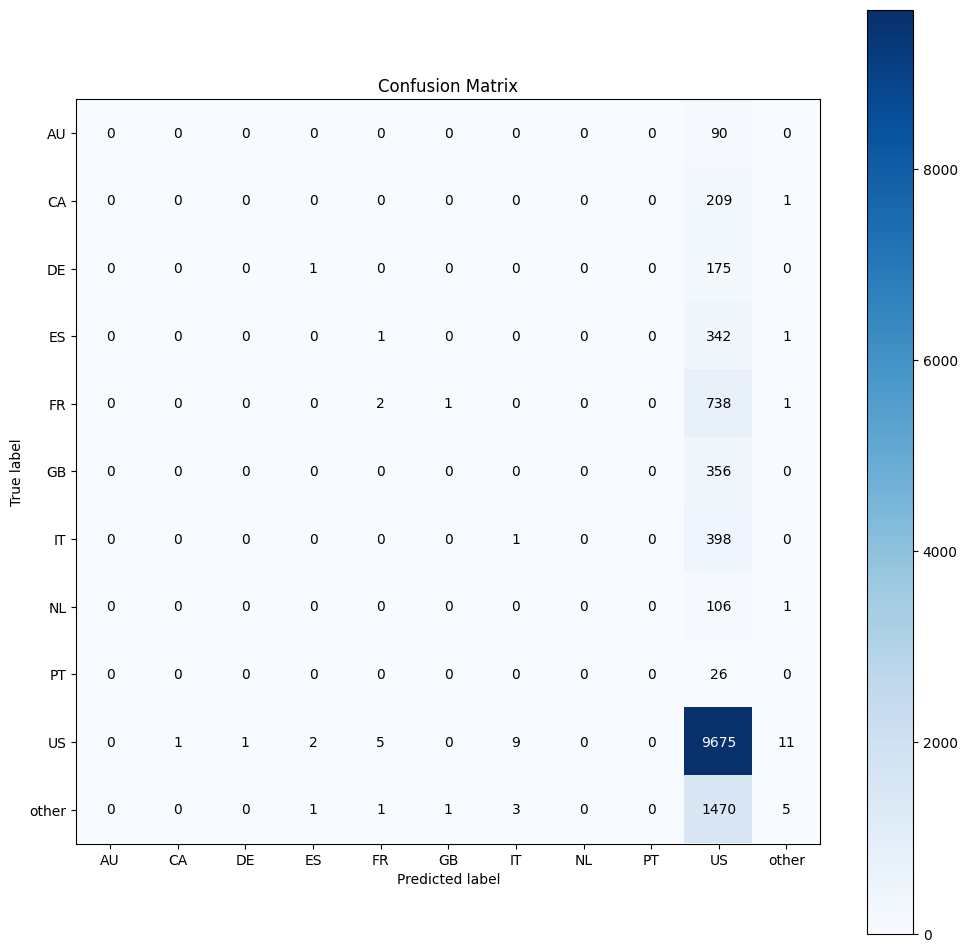

In [110]:
# accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accurary: {:.4f}'.format(acc_nn))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12, 12))
